In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Creating path

path = r'C:\Users\Karen\Documents\Personal\Data Analytics\Career Foundry\Achievement 4\Instacart Basket Analysis'

In [3]:
# Importing data set

df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Removing the limit to columns and rows displayed so I can see all the rows and columns going forward

pd.options.display.max_columns = None
pd.options.display.max_rows = None

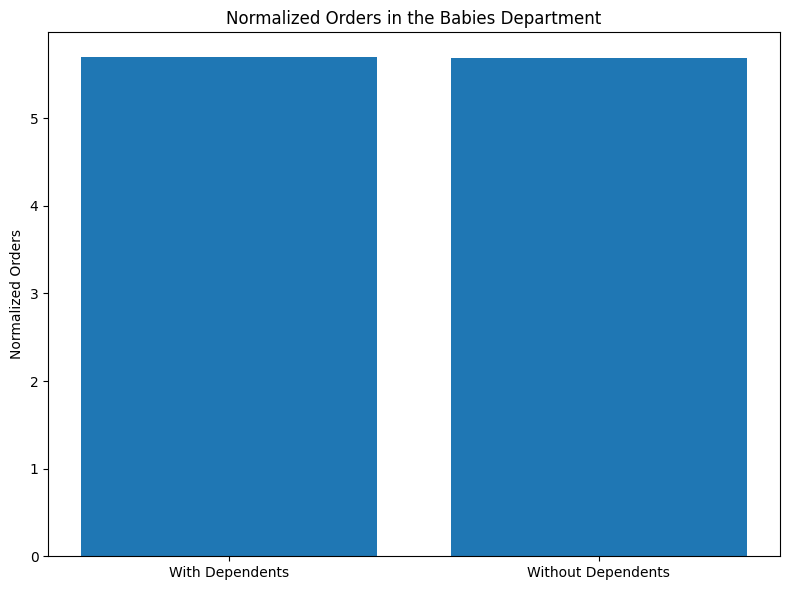

In [5]:
# Total orders for the babies department normalized by those with and without dependents

# Filter the data for the 'babies' department
babies_data = df[df['department'] == 'babies']

# Count the unique orders for customers with and without dependents in the 'babies' department
orders_with_dependents = babies_data[babies_data['number_of_dependents'] > 0]['order_id'].nunique()
orders_without_dependents = babies_data[babies_data['number_of_dependents'] == 0]['order_id'].nunique()

# Calculate the total count of baby customers with and without dependents
total_baby_customers_with_dependents = babies_data[babies_data['number_of_dependents'] > 0]['user_id'].nunique()
total_baby_customers_without_dependents = babies_data[babies_data['number_of_dependents'] == 0]['user_id'].nunique()

# Normalize the number of orders by the total count of customers with and without dependents
normalized_orders_with = orders_with_dependents / total_baby_customers_with_dependents
normalized_orders_without = orders_without_dependents / total_baby_customers_without_dependents

# Create a vertical bar chart
labels = ['With Dependents', 'Without Dependents']
heights = [normalized_orders_with, normalized_orders_without]

plt.figure(figsize=(8, 6))
plt.bar(labels, heights)
plt.ylabel('Normalized Orders')
plt.xlabel('')
plt.title('Normalized Orders in the Babies Department')

plt.tight_layout()
plt.show()


In [6]:
total_baby_customers_with_dependents = babies_data[babies_data['number_of_dependents'] > 0]['user_id'].nunique()
total_baby_customers_without_dependents = babies_data[babies_data['number_of_dependents'] == 0]['user_id'].nunique()

In [7]:
total_baby_customers_with_dependents

22653

In [8]:
orders_with_dependents

129037

In [9]:
total_baby_customers_without_dependents

7577

In [10]:
orders_without_dependents

43064

In [11]:
df.groupby('department').count()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_order_price,spending_flag,median_days_since_prior_order,regularity_flag,Gender,State,Age,date_joined,number_of_dependents,fam_status,income,_merge,Region,exclusion_flag,age_range,order_total,income_flag,customer_profile
department,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
alcohol,144627,144627,144627,144627,144627,134867,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627,144627
babies,410392,410392,410392,410392,410392,391707,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392,410392
bakery,1120828,1120828,1120828,1120828,1120828,1060612,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828,1120828
beverages,2571901,2571901,2571901,2571901,2571901,2437586,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901,2571901
breakfast,670850,670850,670850,670850,670850,633469,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850,670850
bulk,33451,33451,33451,33451,33451,31998,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451,33451
canned goods,1012074,1012074,1012074,1012074,1012074,954449,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074,1012074
dairy eggs,5177182,5177182,5177182,5177182,5177182,4909353,5177182,5177182,5177182,5177182,5177182,5177182,5172305,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182,5177182
deli,1003834,1003834,1003834,1003834,1003834,947553,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834,1003834


In [12]:
len(babies_data.index)

410392

In [13]:
df.groupby(['customer_profile', 'loyalty_flag']).agg('mean', 'max', 'min')

order_id  \
customer_profile                                  loyalty_flag                     
middle-aged, above average income, has dependents Loyal customer    1.711609e+06   
                                                  New customer      1.717120e+06   
                                                  Regular customer  1.706870e+06   
middle-aged, above average income, no dependents  Loyal customer    1.708004e+06   
                                                  New customer      1.705677e+06   
                                                  Regular customer  1.713971e+06   
middle-aged, below average income, has dependents Loyal customer    1.709001e+06   
                                                  New customer      1.710423e+06   
                                                  Regular customer  1.708373e+06   
middle-aged, below average income, no dependents  Loyal customer    1.701243e+06   
                                                  New customer      1.730840e+06   
                                                  Regular customer  1.716606e+06   
older, above average income, has dependents       Loyal customer    1.711231e+06   
                                                  New customer      1.710439e+06   
                                                  Regular customer  1.708373e+06   
older, above average income, no dependents        Loyal customer    1.718383e+06   
                                                  New customer      1.716210e+06   
                                                  Regular customer  1.712396e+06   
older, below average income, has dependents       Loyal customer    1.704686e+06   
                                                  New customer      1.698887e+06   
                                                  Regular customer  1.707620e+06   
older, below average income, no dependents        Loyal customer    1.708874e+06   
                                                  New customer      1.710524e+06   
                                                  Regular customer  1.704779e+06   
young, above average income, has dependents       Loyal customer    1.703038e+06   
                                                  New customer      1.734924e+06   
                                                  Regular customer  1.703954e+06   
young, above average income, no dependents        Loyal customer    1.694068e+06   
                                                  New customer      1.660497e+06   
                                                  Regular customer  1.722235e+06   
young, below average income, has dependents       Loyal customer    1.711910e+06   
                                                  New customer      1.708544e+06   
                                                  Regular customer  1.712054e+06   
young, below average income, no dependents        Loyal customer    1.710842e+06   
                                                  New customer      1.719346e+06   
                                                  Regular customer  1.711488e+06   

                                                                    order_number  \
customer_profile                                  loyalty_flag                     
middle-aged, above average income, has dependents Loyal customer       32.712336   
                                                  New customer          4.277981   
                                                  Regular customer     12.297339   
middle-aged, above average income, no dependents  Loyal customer       33.246797   
                                                  New customer          4.259511   
                                                  Regular customer     12.344948   
middle-aged, below average income, has dependents Loyal customer       32.423902   
                                                  New customer          4.249529   
                                       

In [15]:
df.groupby(['customer_profile', 'loyalty_flag'])['order_id'].agg('count')

customer_profile                                   loyalty_flag    
middle-aged, above average income, has dependents  Loyal customer      2044052
                                                   New customer         934780
                                                   Regular customer    3196536
middle-aged, above average income, no dependents   Loyal customer       724455
                                                   New customer         308041
                                                   Regular customer    1062581
middle-aged, below average income, has dependents  Loyal customer      1551880
                                                   New customer         757354
                                                   Regular customer    2387958
middle-aged, below average income, no dependents   Loyal customer       524344
                                                   New customer         245221
                                                   Regular cust